In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt



In [28]:
df = pd.read_csv('heart_failure.csv')
df.head()



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [29]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [30]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

C:\Users\kakat\AppData\Local\Temp\ipykernel_12856\3666623394.py:1: Pandas4Warning: The copy keyword is deprecated and will be removed in a future version. Copy-on-Write is active in pandas since 3.0 which utilizes a lazy copy mechanism that defers copies until necessary. Use .copy() to make an eager copy if necessary.
  df['DEATH_EVENT'].value_counts().plot(kind='bar')


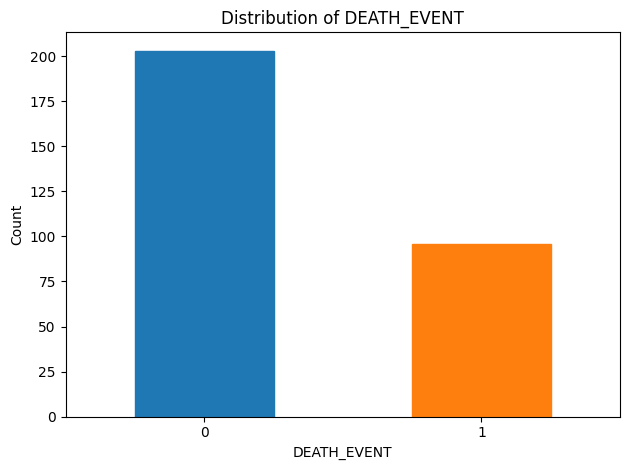

In [31]:
df['DEATH_EVENT'].value_counts().plot(kind='bar')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')
plt.title('Distribution of DEATH_EVENT')
plt.xticks(rotation=0)
colors = ['#1f77b4', '#ff7f0e']
plt.gca().patches[0].set_color(colors[0])
plt.gca().patches[1].set_color(colors[1])
plt.tight_layout()
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
x = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (239, 12)
x_test shape: (60, 12)
y_train shape: (239,)
y_test shape: (60,)


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)   
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60

Confusion Matrix:
 [[33  2]
 [13 12]]


In [41]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  

Confusion Matrix:
 [[33  2]
 [13 12]]


In [43]:
import joblib
joblib.dump(model, 'heart_disease_model.pkl')
joblib

<module 'joblib' from 'd:\\DATASCIENCE\\PRACTICE\\VS_PROJECT\\Heart_Disease_project\\myenv\\Lib\\site-packages\\joblib\\__init__.py'>